In [1]:
from steamship import Block, Steamship
import re
from IPython.display import Image

In [2]:
from langchain import OpenAI
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.tools import SteamshipImageGenerationTool
import os

In [3]:
llm = OpenAI(temperature=0)
steamship = Steamship(api_key="58D8979C-E1F4-45B3-8D0C-B29B6A351B98")

In [7]:
tools = [SteamshipImageGenerationTool(model_name="dall-e")]

In [8]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

In [13]:
output = mrkl.run("a realistic picture of a close black hole in the night sky from earth")



> Entering new  chain...
 I need to generate an image of a black hole in the night sky
Action: GenerateImage
Action Input: A detailed text-2-image prompt describing a realistic picture of a close black hole in the night sky from earth
Observation: 5CA7F7BF-8EA6-41CD-ABB4-055812A88BE3
Thought: I now have the UUID of the generated image
Final Answer: 5CA7F7BF-8EA6-41CD-ABB4-055812A88BE3

> Finished chain.


In [14]:
def show_output(output):
    """Display the multi-modal output from the agent."""
    UUID_PATTERN = re.compile(
        r"([0-9A-Za-z]{8}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{12})"
    )

    outputs = UUID_PATTERN.split(output)
    outputs = [
        re.sub(r"^\W+", "", el) for el in outputs
    ]  # Clean trailing and leading non-word characters

    for output in outputs:
        maybe_block_id = UUID_PATTERN.search(output)
        if maybe_block_id:
            display(Image(Block.get(Steamship(), _id=maybe_block_id.group()).raw()))
        else:
            print(output, end="\n\n")

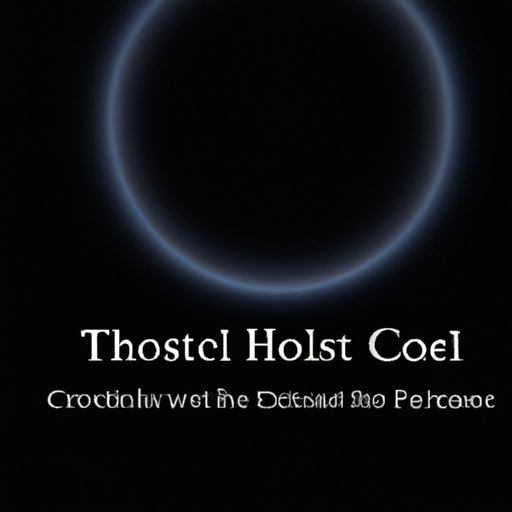

In [15]:
show_output(output)

In [ ]:
import openai


response = openai.Image.create_edit(image=)